<a href="https://colab.research.google.com/github/aknakshay/Computer-Vision/blob/master/MNIST_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,SeparableConv2D,GlobalAveragePooling2D, concatenate
from keras.callbacks import LearningRateScheduler
from keras.optimizers import SGD,Adam
from keras.utils import np_utils
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import keras.backend as K


In [0]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
print("x_train shape" + str(x_train.shape))
print("y_train shape" + str(y_train.shape))

x_train shape(60000, 28, 28)
y_train shape(60000,)


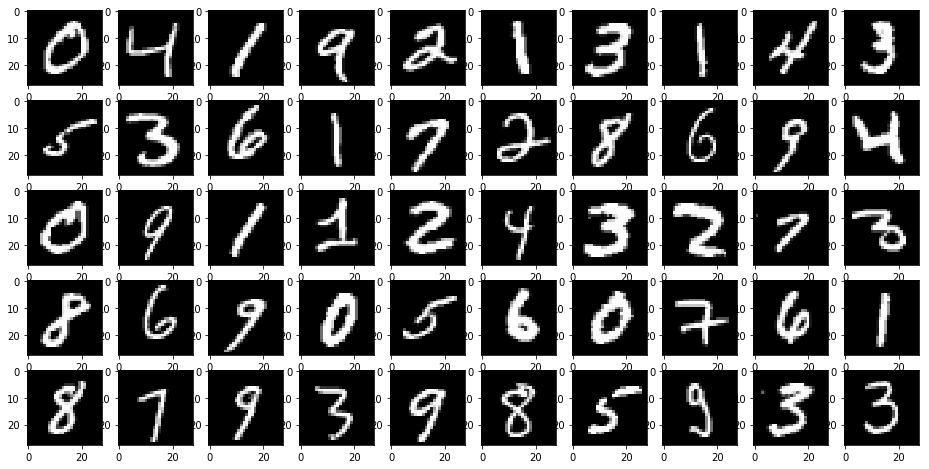

In [0]:
fig=plt.figure(figsize=(16, 8))
columns = 10
rows = 5
for i in range(1, columns*rows +1):
    img = x_train[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img,cmap='gray')
plt.show()

In [0]:
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
X_train /= 255
X_test /= 255
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [0]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
model = Sequential()
 
# Using bigger kernels as information is distributed globally in the image and not locally

model.add(Conv2D(20, (7, 7), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

model.add(Conv2D(10, (5, 5), activation='relu', padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

model.add(Dropout(0.5))



model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [0]:
sgd = SGD(lr=1e-3, decay=5e-4, momentum=0.9, nesterov=True)

adam = Adam(lr=1e-3)

# 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])


In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 20)        1000      
_________________________________________________________________
batch_normalization_7 (Batch (None, 28, 28, 20)        80        
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 10)        5010      
_________________________________________________________________
batch_normalization_8 (Batch (None, 10, 10, 10)        40        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 10)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 10)         

In [0]:

min_epochs = 10  # After this number, user will be asked whether to run another epoch or not
factor = 1 # Factor by which learning rate should be decreased
e_red = 0

# Learning Rate Scheduler
def scheduler(epoch):
  n = K.eval(model.optimizer.lr)
  if i == 'R' or i == 'r':
    n /= factor
  return n

change_lr = LearningRateScheduler(scheduler)
callbacks_list = [change_lr]

  
count = 1
flag = 1
i = 'y'
val = []
train = []
train_loss = []
val_loss = []

while flag==1:

  # Checking if another epoch needs to be run
  if count > min_epochs:
    print("Type y for running another epoch")
    print("Type n to stop the training")
    inp = input()
    if inp == 'y' or inp == 'Y':
      flag = 1
    elif inp == 'n' or inp == 'N':
      flag = 0
      break

  print("\n\nINFO: Training epoch number: " + str(count) + " with learning rate: " + str(K.eval(model.optimizer.lr)) + "\n")

  history = model.fit(X_train, Y_train, batch_size=32, epochs=1, verbose=1,validation_split=0.1,callbacks=callbacks_list)
  
  
  # Appending validation accuracy to list to check whether lr needs to be reduced
  val.append(history.history['val_acc'])
  train.append(history.history['acc'])
  train_loss.append(history.history['loss'])
  val_loss.append(history.history['val_loss'])
  # To decrease learning rate
  if len(val) > 3:
    if val[len(val)-1][0] - val[len(val)-3][0] < 0.01 and count - e_red > 2: 
      print("INFO: Reducing learning rate by factor of " + str(factor) + " after the next epoch")
      # Setting the parameter for scheduler
      i = 'r'
      e_red = count
    else:
      i = 'n'

  #Increasing the epoch number
  count += 1
  




INFO: Training epoch number: 1 with learning rate: 0.001

Train on 54000 samples, validate on 6000 samples
Epoch 1/1
54000/54000 [==============================] - 16s 294us/step - loss: 0.3126 - acc: 0.9024 - val_loss: 0.0540 - val_acc: 0.9842


INFO: Training epoch number: 2 with learning rate: 0.001

Train on 54000 samples, validate on 6000 samples
Epoch 1/1
54000/54000 [==============================] - 15s 276us/step - loss: 0.1024 - acc: 0.9684 - val_loss: 0.0822 - val_acc: 0.9763


INFO: Training epoch number: 3 with learning rate: 0.001

Train on 54000 samples, validate on 6000 samples
Epoch 1/1
54000/54000 [==============================] - 15s 278us/step - loss: 0.0795 - acc: 0.9749 - val_loss: 0.0434 - val_acc: 0.9872


INFO: Training epoch number: 4 with learning rate: 0.001

Train on 54000 samples, validate on 6000 samples
Epoch 1/1
54000/54000 [==============================] - 15s 276us/step - loss: 0.0709 - acc: 0.9778 - val_loss: 0.0397 - val_acc: 0.9872


INFO: Trai

### Observations


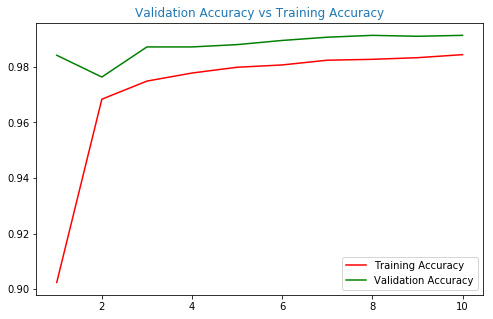

In [0]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title('Validation Accuracy vs Training Accuracy', color='C0')
ax.plot(range(1,len(train)+1),train[:len(train)],  label='Training Accuracy',color='red')
ax.plot(range(1,len(train)+1),val, label='Validation Accuracy', color='green')
ax.legend()

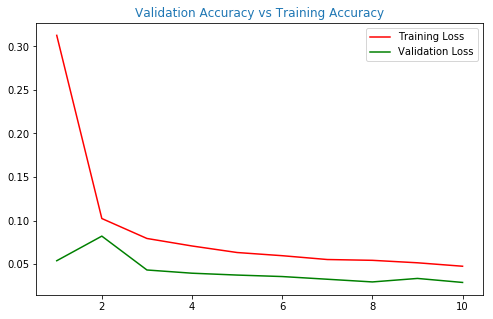

In [0]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title('Validation Accuracy vs Training Accuracy', color='C0')
ax.plot(range(1,len(train)+1),train_loss[:len(train)],  label='Training Loss',color='red')
ax.plot(range(1,len(train)+1),val_loss, label='Validation Loss', color='green')
ax.legend()

In [0]:
 # 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=0)
print("Loss: " + str(score[0]))
print("Accuracy: " + str(score[1]*100) + "%")

Loss: 0.02402635349757038
Accuracy: 99.2%


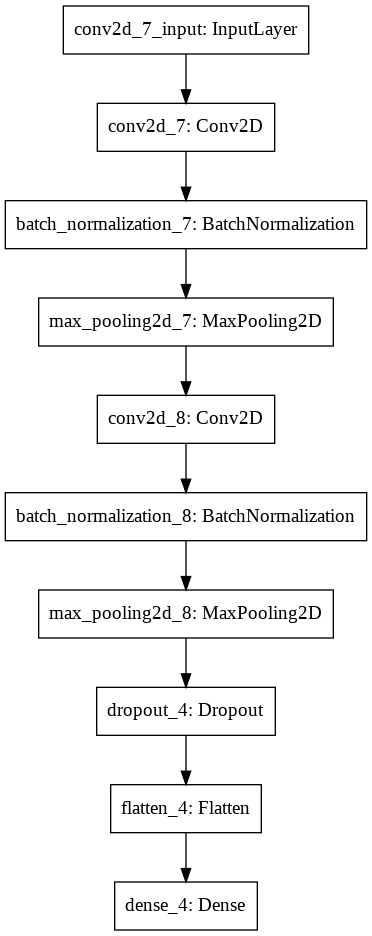

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='8k-model.png')

In [0]:
model.save('8k-mnist.h5')

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp 8k-mnist.h5 /content/drive/My\ Drive/Project/MNIST-Challenge
!cp 8k-model.png /content/drive/My\ Drive/Project/MNIST-Challenge

# < 5k params

In [0]:
model = Sequential()

model.add(SeparableConv2D(28, (3, 3), strides=(1, 1), padding='valid', depth_multiplier=1, activation='relu' , input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

model.add(SeparableConv2D(16, (3, 3), activation='relu', padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [0]:
sgd = SGD(lr=1e-3, decay=5e-4, momentum=0.9, nesterov=True)

adam = Adam(lr=1e-3)

# 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])


In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_1 (Separabl (None, 26, 26, 28)        65        
_________________________________________________________________
batch_normalization_9 (Batch (None, 26, 26, 28)        112       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 11, 11, 16)        716       
_________________________________________________________________
batch_normalization_10 (Batc (None, 11, 11, 16)        64        
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 5, 16)         

In [0]:

min_epochs = 10  # After this number, user will be asked whether to run another epoch or not
factor = 1 # Factor by which learning rate should be decreased
e_red = 0

# Learning Rate Scheduler
def scheduler(epoch):
  n = K.eval(model.optimizer.lr)
  if i == 'R' or i == 'r':
    n /= factor
  return n

change_lr = LearningRateScheduler(scheduler)
callbacks_list = [change_lr]

  
count = 1
flag = 1
i = 'y'
val = []
train = []
train_loss = []
val_loss = []

while flag==1:

  # Checking if another epoch needs to be run
  if count > min_epochs:
    print("Type y for running another epoch")
    print("Type n to stop the training")
    inp = input()
    if inp == 'y' or inp == 'Y':
      flag = 1
    elif inp == 'n' or inp == 'N':
      flag = 0
      break

  print("\n\nINFO: Training epoch number: " + str(count) + " with learning rate: " + str(K.eval(model.optimizer.lr)) + "\n")

  history = model.fit(X_train, Y_train, batch_size=32, epochs=1, verbose=1,validation_split=0.1,callbacks=callbacks_list)
  
  
  # Appending validation accuracy to list to check whether lr needs to be reduced
  val.append(history.history['val_acc'])
  train.append(history.history['acc'])
  train_loss.append(history.history['loss'])
  val_loss.append(history.history['val_loss'])
  # To decrease learning rate
  if len(val) > 3:
    if val[len(val)-1][0] - val[len(val)-3][0] < 0.01 and count - e_red > 2: 
      print("INFO: Reducing learning rate by factor of " + str(factor) + " after the next epoch")
      # Setting the parameter for scheduler
      i = 'r'
      e_red = count
    else:
      i = 'n'

  #Increasing the epoch number
  count += 1
  




INFO: Training epoch number: 1 with learning rate: 0.001

Train on 54000 samples, validate on 6000 samples
Epoch 1/1
54000/54000 [==============================] - 19s 359us/step - loss: 0.3179 - acc: 0.8997 - val_loss: 0.0909 - val_acc: 0.9742


INFO: Training epoch number: 2 with learning rate: 0.001

Train on 54000 samples, validate on 6000 samples
Epoch 1/1
54000/54000 [==============================] - 18s 341us/step - loss: 0.1274 - acc: 0.9597 - val_loss: 0.0655 - val_acc: 0.9802


INFO: Training epoch number: 3 with learning rate: 0.001

Train on 54000 samples, validate on 6000 samples
Epoch 1/1
54000/54000 [==============================] - 18s 341us/step - loss: 0.1010 - acc: 0.9692 - val_loss: 0.0623 - val_acc: 0.9827


INFO: Training epoch number: 4 with learning rate: 0.001

Train on 54000 samples, validate on 6000 samples
Epoch 1/1
54000/54000 [==============================] - 18s 339us/step - loss: 0.0921 - acc: 0.9706 - val_loss: 0.0583 - val_acc: 0.9813
INFO: Reduci

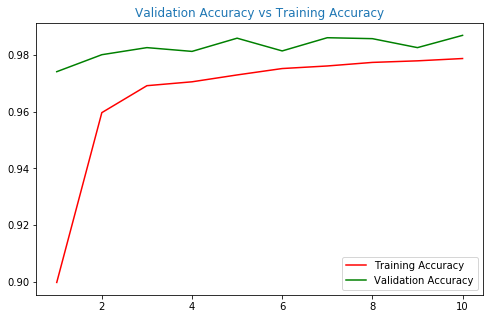

In [0]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title('Validation Accuracy vs Training Accuracy', color='C0')
ax.plot(range(1,len(train)+1),train[:len(train)],  label='Training Accuracy',color='red')
ax.plot(range(1,len(train)+1),val, label='Validation Accuracy', color='green')
ax.legend()

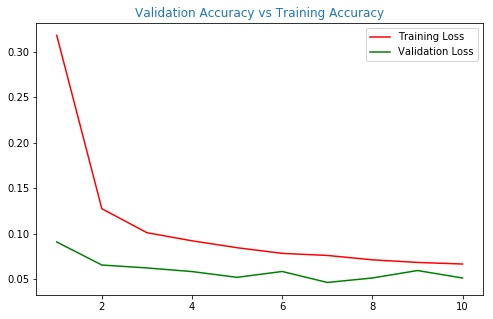

In [0]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title('Validation Accuracy vs Training Accuracy', color='C0')
ax.plot(range(1,len(train)+1),train_loss[:len(train)],  label='Training Loss',color='red')
ax.plot(range(1,len(train)+1),val_loss, label='Validation Loss', color='green')
ax.legend()

In [0]:
 # 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=0)
print("Loss: " + str(score[0]))
print("Accuracy: " + str(score[1]*100) + "%")

Loss: 0.04849557214657543
Accuracy: 98.42%


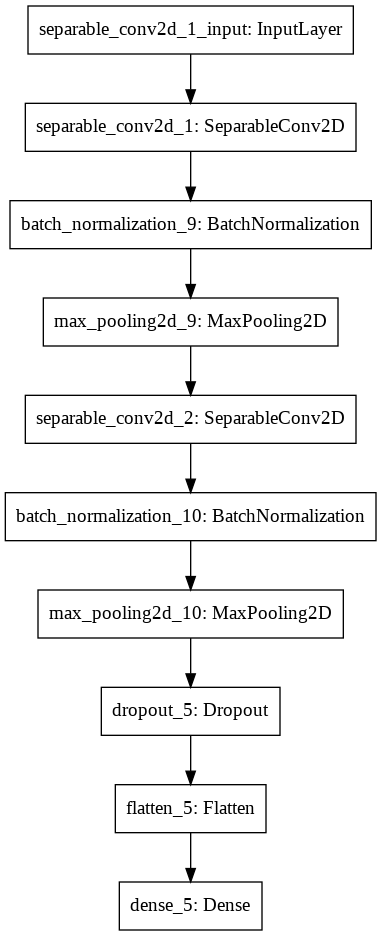

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='5k-model.png')

In [0]:
model.save('5k-mnist.h5')

In [0]:
!cp 5k-mnist.h5 /content/drive/My\ Drive/Project/MNIST-Challenge
!cp 5k-model.png /content/drive/My\ Drive/Project/MNIST-Challenge

# New - Inception Module


In [0]:
inputs = Input(shape=(28,28,1))

lay1 = SeparableConv2D(2, (3, 3), strides=(1, 1), padding='same', activation='relu')(inputs)
lay1 = MaxPooling2D(pool_size=(2,2), strides=(1, 1),padding='same')(lay1)
lay1 = Conv2D(1, (1, 1), strides=(1, 1), padding='same', activation='relu')(lay1)
lay1 = Dropout(0.25)(lay1)

lay2 = Conv2D(2, (1, 1), strides=(1, 1), padding='same', activation='relu')(inputs)
lay2 = SeparableConv2D(2, (5,5), strides=(1, 1), padding='same', activation='relu')(lay2)
lay2 = Dropout(0.25)(lay2)

lay3 = Conv2D(2, (1, 1), strides=(1, 1), padding='same', activation='relu')(inputs)
lay3 = Dropout(0.25)(lay3)

lay4 = Conv2D(2, (1, 1), strides=(1, 1), padding='same', activation='relu')(inputs)
lay4 = SeparableConv2D(2, (3, 3), strides=(1, 1), padding='same', activation='relu')(lay4)
lay4 = Dropout(0.25)(lay4)

fc = concatenate([lay1,lay2,lay3,lay4])

fc = SeparableConv2D(2, (3, 3), strides=(2, 2), padding='valid', activation='relu')(fc)
fc = MaxPooling2D(pool_size=(2,2), strides=(1, 1),padding='valid')(fc)
fc = Dropout(0.25)(fc)
#fc = Conv2D(2, (1, 1), strides=(1, 1), padding='same', activation='relu')(fc)
fc = Flatten()(fc)
outputs = Dense(10,activation='softmax')(fc)

model = Model(input=inputs,output=outputs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [0]:
sgd = SGD(lr=1e-3, decay=5e-4, momentum=0.9, nesterov=True)

adam = Adam(lr=1e-3)

# 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])


In [0]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
separable_conv2d_23 (SeparableC (None, 28, 28, 2)    13          input_6[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_21 (MaxPooling2D) (None, 28, 28, 2)    0           separable_conv2d_23[0][0]        
__________________________________________________________________________________________________
conv2d_30 (Conv2D)              (None, 28, 28, 2)    4           input_6[0][0]                    
____________________________________________________________________________________________

In [0]:

min_epochs = 10  # After this number, user will be asked whether to run another epoch or not
factor = 1 # Factor by which learning rate should be decreased
e_red = 0

# Learning Rate Scheduler
def scheduler(epoch):
  n = K.eval(model.optimizer.lr)
  if i == 'R' or i == 'r':
    n /= factor
  return n

change_lr = LearningRateScheduler(scheduler)
callbacks_list = [change_lr]

  
count = 1
flag = 1
i = 'y'
val = []
train = []
train_loss = []
val_loss = []

while flag==1:

  # Checking if another epoch needs to be run
  if count > min_epochs:
    print("Type y for running another epoch")
    print("Type n to stop the training")
    inp = input()
    if inp == 'y' or inp == 'Y':
      flag = 1
    elif inp == 'n' or inp == 'N':
      flag = 0
      break

  print("\n\nINFO: Training epoch number: " + str(count) + " with learning rate: " + str(K.eval(model.optimizer.lr)) + "\n")

  history = model.fit(X_train, Y_train, batch_size=32, epochs=1, verbose=1,validation_split=0.1,callbacks=callbacks_list)
  
  
  # Appending validation accuracy to list to check whether lr needs to be reduced
  val.append(history.history['val_acc'])
  train.append(history.history['acc'])
  train_loss.append(history.history['loss'])
  val_loss.append(history.history['val_loss'])
  # To decrease learning rate
  if len(val) > 3:
    if val[len(val)-1][0] - val[len(val)-3][0] < 0.01 and count - e_red > 2: 
      print("INFO: Reducing learning rate by factor of " + str(factor) + " after the next epoch")
      # Setting the parameter for scheduler
      i = 'r'
      e_red = count
    else:
      i = 'n'

  #Increasing the epoch number
  count += 1
  




INFO: Training epoch number: 1 with learning rate: 0.001

Train on 54000 samples, validate on 6000 samples
Epoch 1/1
54000/54000 [==============================] - 29s 533us/step - loss: 0.5847 - acc: 0.8085 - val_loss: 0.1739 - val_acc: 0.9507


INFO: Training epoch number: 2 with learning rate: 0.001

Train on 54000 samples, validate on 6000 samples
Epoch 1/1
54000/54000 [==============================] - 26s 477us/step - loss: 0.2594 - acc: 0.9184 - val_loss: 0.1384 - val_acc: 0.9607


INFO: Training epoch number: 3 with learning rate: 0.001

Train on 54000 samples, validate on 6000 samples
Epoch 1/1
54000/54000 [==============================] - 26s 475us/step - loss: 0.2160 - acc: 0.9326 - val_loss: 0.1147 - val_acc: 0.9688


INFO: Training epoch number: 4 with learning rate: 0.001

Train on 54000 samples, validate on 6000 samples
Epoch 1/1
54000/54000 [==============================] - 26s 479us/step - loss: 0.1922 - acc: 0.9401 - val_loss: 0.0994 - val_acc: 0.9715


INFO: Trai

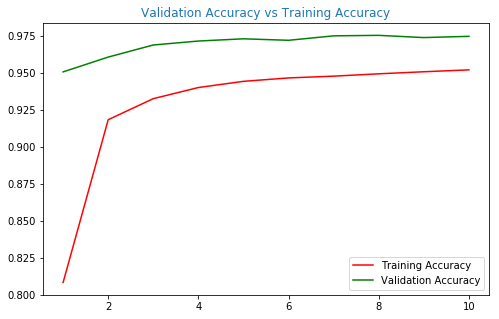

In [0]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title('Validation Accuracy vs Training Accuracy', color='C0')
ax.plot(range(1,len(train)+1),train[:len(train)],  label='Training Accuracy',color='red')
ax.plot(range(1,len(train)+1),val, label='Validation Accuracy', color='green')
ax.legend()

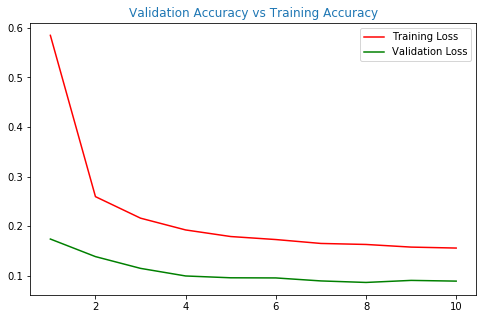

In [0]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title('Validation Accuracy vs Training Accuracy', color='C0')
ax.plot(range(1,len(train)+1),train_loss[:len(train)],  label='Training Loss',color='red')
ax.plot(range(1,len(train)+1),val_loss, label='Validation Loss', color='green')
ax.legend()

In [0]:
 # 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=0)
print("Loss: " + str(score[0]))
print("Accuracy: " + str(score[1]*100) + "%")

Loss: 0.08758189804255963
Accuracy: 97.36%


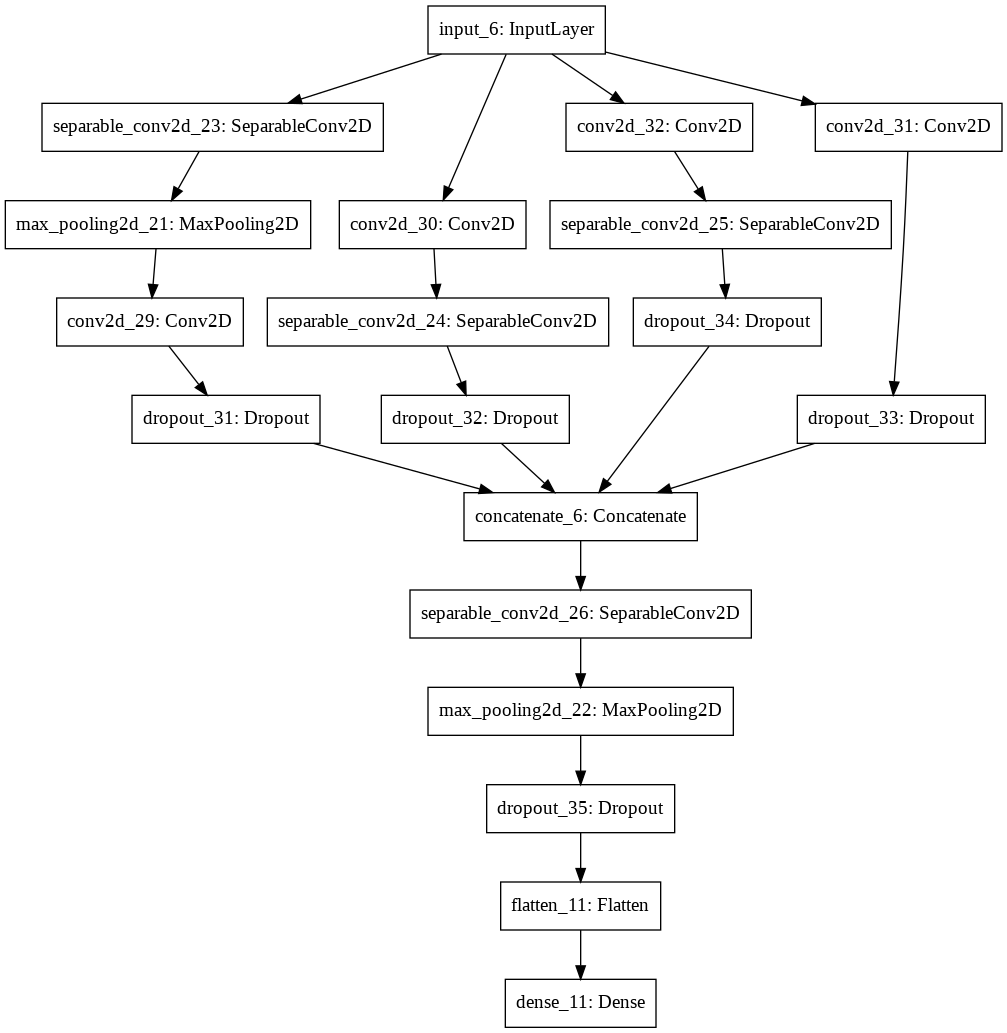

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='3k-model.png')

In [0]:
model.save('3k-mnist.h5')

In [0]:
!cp 3k-mnist.h5 /content/drive/My\ Drive/Project/MNIST-Challenge
!cp 3k-model.png /content/drive/My\ Drive/Project/MNIST-Challenge